✅ Dataset Loaded Successfully
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
K=3 | Accuracy: 1.000
K=5 | Accuracy: 1.000
K=7 | Accuracy: 1.000
K=9 | Accuracy: 1.000

✅ Best K found: 3

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.

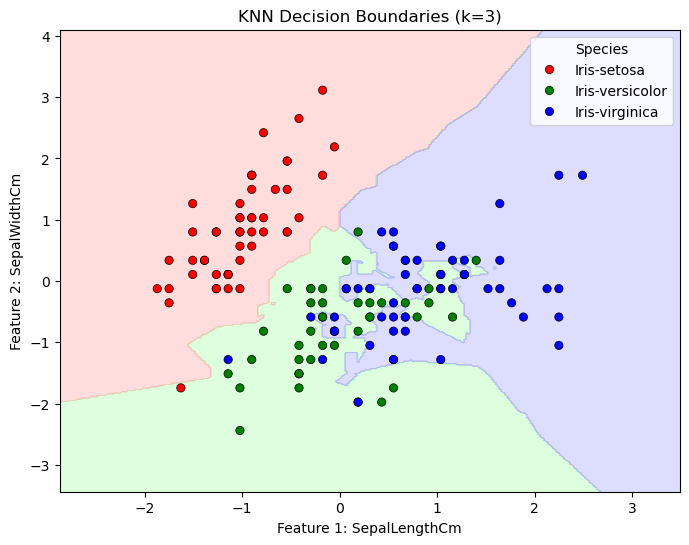

In [17]:
# ------------------- KNN Classification on Iris Dataset -------------------
# Objective: To build and evaluate a KNN model for classification using normalized features

import warnings
warnings.filterwarnings("ignore")

# Libraries
import pandas as pd
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder


# ------------------- Load Dataset -------------------
# Option 1: Load from CSV
csv_path = r"D:\mydata\Elevate Labs\task6\Iris.csv"
df = pd.read_csv(csv_path)

# Option 2: Load from SQLite (uncomment if you want to read from database)
# conn = sqlite3.connect("database.sqlite")
# df = pd.read_sql_query("SELECT * FROM Iris", conn)
# conn.close()

print("✅ Dataset Loaded Successfully")
print(df.head())

# ------------------- Preprocessing -------------------
# Drop ID column if present
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

# Define features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------- Train-Test Split -------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ------------------- Model Training -------------------
k_values = [3, 5, 7, 9]
accuracy_results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results.append(acc)
    print(f"K={k} | Accuracy: {acc:.3f}")

# Choose best K
best_k = k_values[np.argmax(accuracy_results)]
print(f"\n✅ Best K found: {best_k}")

# ------------------- Final Model -------------------
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ------------------- Decision Boundary Visualization -------------------
# Only using first two features for visualization
X_vis = X_scaled[:, :2]
y_vis = y

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_v, y_train_v)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# Z is the predicted class labels (numerical encoding)
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])

# Encode string labels to numbers if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Z_encoded = le.fit_transform(Z)

# Reshape the flat array to 2D grid shape
Z_2d = Z_encoded.reshape(xx.shape)
# Now plot the contour with the correctly shaped array





plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z_2d, alpha=0.4, cmap=cmap_light)
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_vis, palette=cmap_bold, edgecolor='k')
plt.title(f"KNN Decision Boundaries (k={best_k})")
plt.xlabel("Feature 1: SepalLengthCm")
plt.ylabel("Feature 2: SepalWidthCm")
plt.show()
